# Exercise sheet 9 - Wine tasting

For this exercise, you will need to load the dataset (Wines2012) from the rethinking package that we discussed already
in the class.

In [1]:
library(rethinking)
data(Wines2012)
d <- Wines2012

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

This dataset comes from the judgment of Princeton, which was a wine tasting event that took place in 2012 in
Princeton (NJ, USA). The goal was to compare French wines to the ones produced by the New Jersey wine industry.
This dataset contains the following variables that we will be using:

- score: rating assigned by each judge to each wine.
- wine: wine id
- judge: judge name
- flight: red or white wine
- wine.amer: american or french wine
- judge.amer: american or french (or belgian) judge

The goal is to model the score variable (standardise it to facilitate the exercises below) based on the predictors listed
above. Mention clearly the priors you are using throughout the exercises.

## Exercise 1

Focus on the interaction between the variables judge and wine. Use indices for these two variables, e.g. judgeid <- as.integer(d$judge). Start by using a simple linear model to measure the relationship between the score and the 9 judges and 20 wines. Use a figure to summarise the model output. Is there any visible pattern amongst the judges in the one hand and amongst the wines in the other hand? Are there wines that consistently got low/high ratings? Are there judges that are more severe than others?

In [2]:
d$judgeid <- as.integer(d$judge)
# d$judgeid <- scale(d$judgeid)
d$wineid <- as.integer(d$wine)
# d$wineid <- scale(d$wineid)
d.score.max <- max(d$score)
# d$score <- d$score / d.score.max
d$flightid <- as.integer(d$flight) - 1

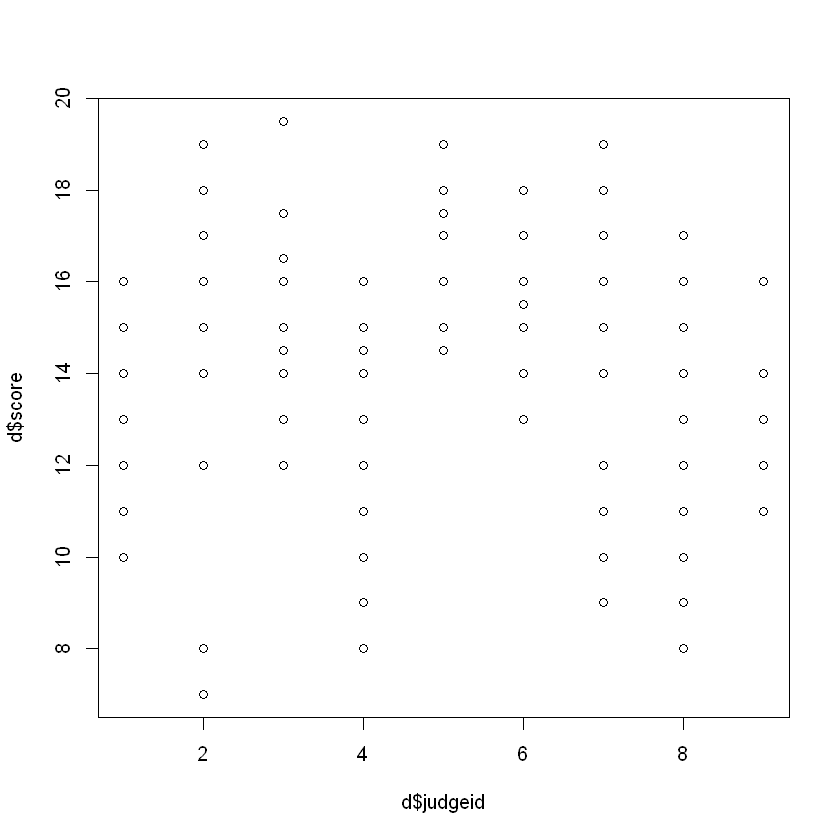

judge,flight,wine,score,wine.amer,judge.amer,judgeid,wineid,flightid
<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
Jean-M Cardebat,white,A1,10.0,1,0,4,1,1
Jean-M Cardebat,white,B1,13.0,1,0,4,3,1
Jean-M Cardebat,white,C1,14.0,0,0,4,5,1
Jean-M Cardebat,white,D1,15.0,0,0,4,7,1
Jean-M Cardebat,white,E1,8.0,1,0,4,9,1
Jean-M Cardebat,white,F1,13.0,1,0,4,11,1
Jean-M Cardebat,white,G1,15.0,1,0,4,13,1
Jean-M Cardebat,white,H1,11.0,0,0,4,15,1
Jean-M Cardebat,white,I1,9.0,1,0,4,17,1


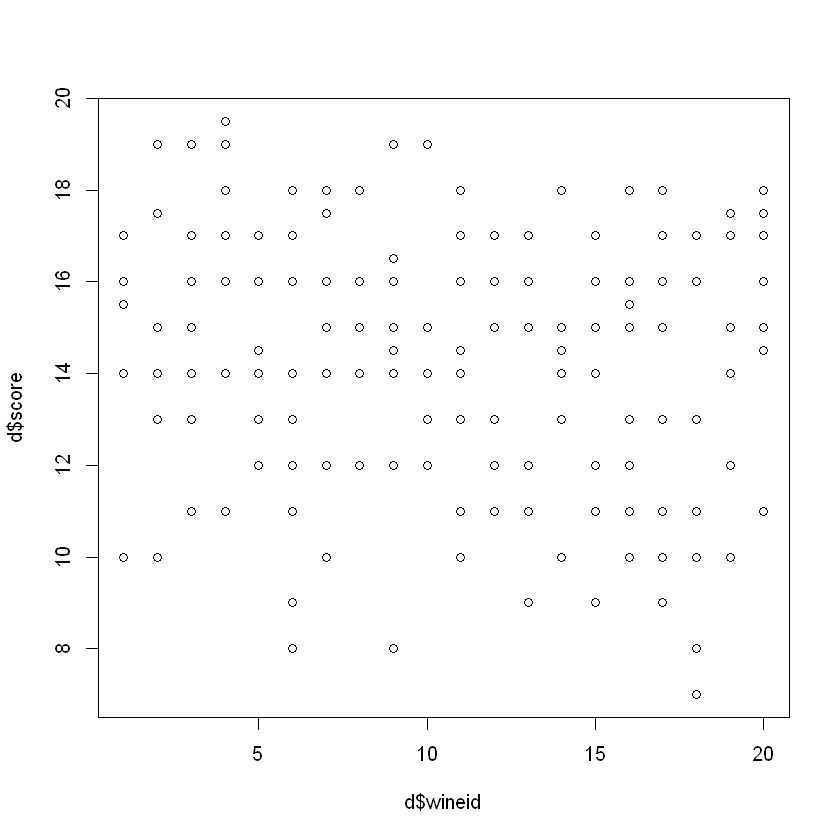

In [3]:
plot(d$judgeid, d$score)
plot(d$wineid, d$score)
d

In [4]:
model <- map(
	alist(
		score <- dnorm(mu, sigma),
		mu <- a + bj * judgeid + bw * wineid + bjw * judgeid * wineid,
		a ~ dnorm(mean(d$score), 10),
		bj ~ dnorm(0, 10),
		bw ~ dnorm(0, 10),
		bjw ~ dnorm(0, 10),
		sigma ~ dunif(0, 20)
	),
	data = d
)

post <- extract.samples(model)
mu.link <- function(judgeid, wineid) post$a + post$bj * judgeid + post$bw * wineid + post$bjw * judgeid * wineid
mu.link.judgeid <- function(judgeid) mu.link(judgeid, wineid = mean(d$wineid))
mu.link.wineid <- function(wineid) mu.link(judgeid = mean(d$judgeid), wineid)

In [5]:
judgeid.seq <- seq(from = min(d$judgeid), to = max(d$judgeid), by = 0.01)
wineid.seq <- seq(from = min(d$wineid), to = max(d$wineid), by = 0.01)

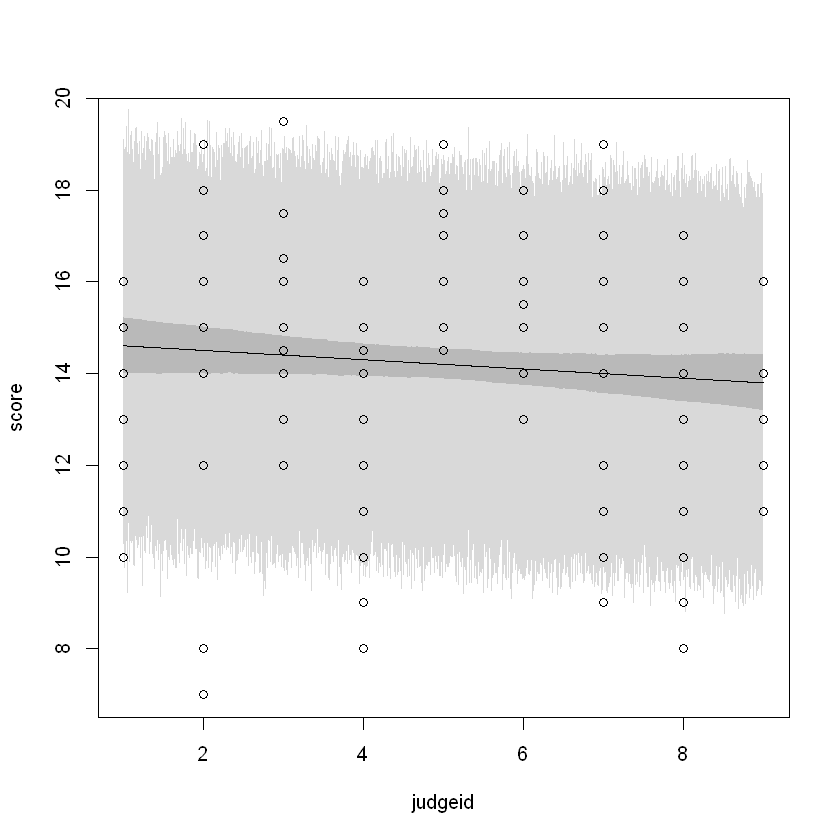

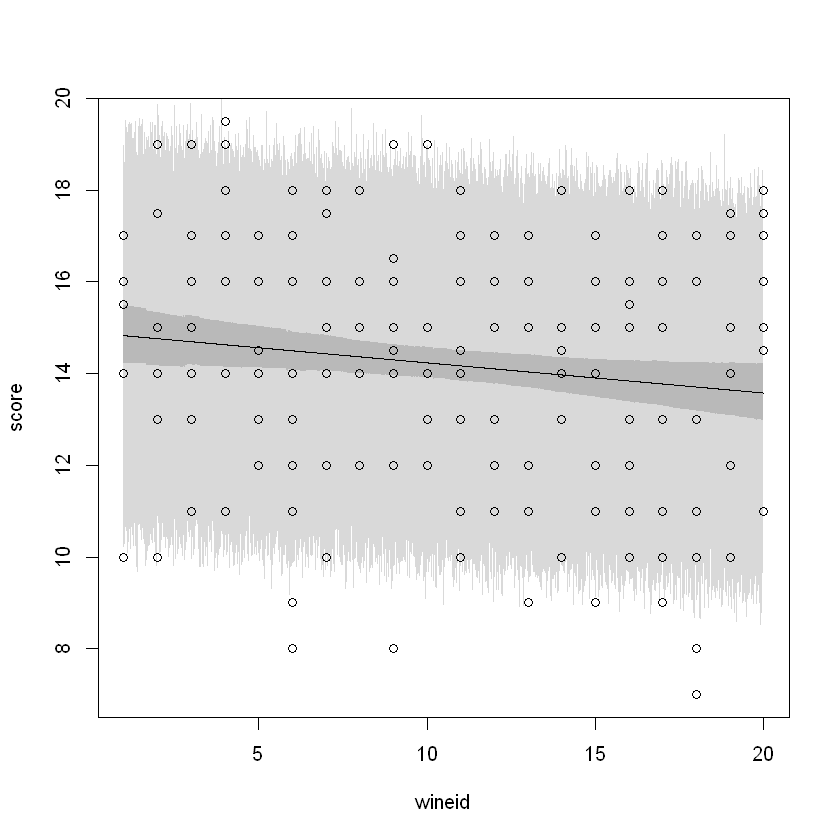

In [6]:
# This function plots a given model with shades
plot_with_shade_judgeid <- function(output, mu.link) {
# For each weight value we calculate a 91 percent credible interval
mu <- sapply(judgeid.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(score ~ judgeid, d)
lines(judgeid.seq, mu.mean)
shade(mu.HPDI, judgeid.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.score <- sim(output, data = list(judgeid = judgeid.seq, wineid = mean(d$wineid)))
score.HPDI <- apply(sim.score, 2, HPDI, prob = 0.91)
shade(score.HPDI, judgeid.seq)
}

plot_with_shade_wineid <- function(output, mu.link) {
# For each weight value we calculate a 91 percent credible interval
mu <- sapply(wineid.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(score ~ wineid, d)
lines(wineid.seq, mu.mean)
shade(mu.HPDI, wineid.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.score <- sim(output, data = list(wineid = wineid.seq, judgeid = mean(d$judgeid)))
score.HPDI <- apply(sim.score, 2, HPDI, prob = 0.91)
shade(score.HPDI, wineid.seq)
}

plot_with_shade_judgeid(model, mu.link.judgeid)
plot_with_shade_wineid(model, mu.link.wineid)

This was a dud. The linear model obviously doesnt tell us anything. We see that some wines have a little better scores than others, and some judges give on average better scores than others. For the useless model we used quite harmless priors that nearly dont restrict the parameters.

## Exercise 2

Focus now on the flight, wine.amer and judge.amer variables. Build a linear model (without interactions for the time being) to model the score form these three predictors. Is there an identifiable bias between judge and wine regions? Is one flight favoured over the other? Compute posterior differences to aid in your analysis of the results.

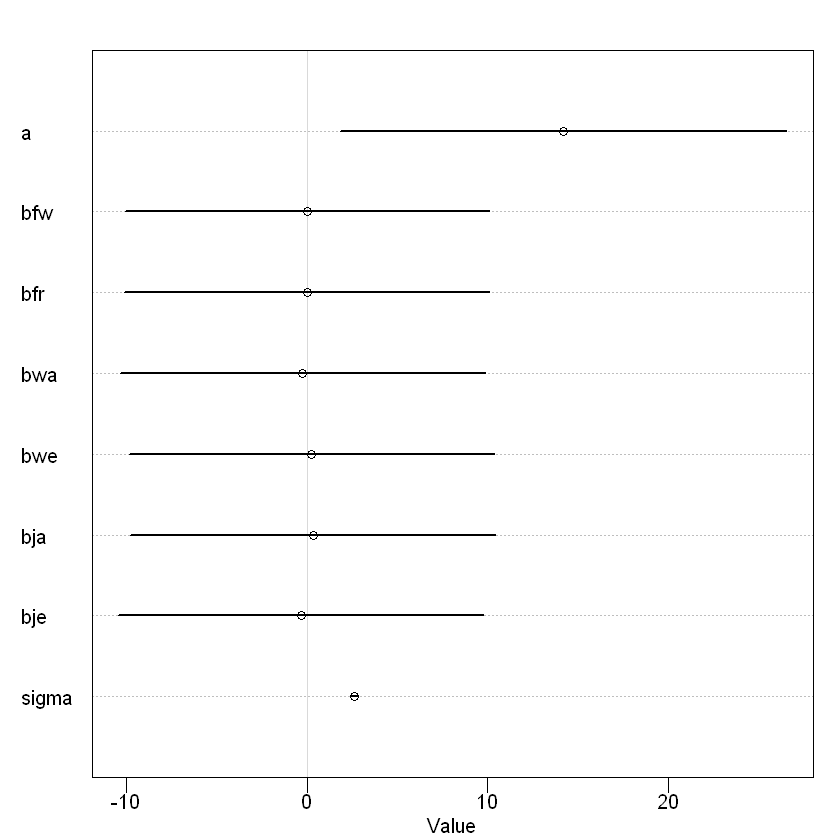

In [17]:
model1 <- map(
	alist(
		score ~ dnorm(mu, sigma),
		mu <- a + bfw * flightid + bfr * (1 - flightid) + bwa * wine.amer + bwe * (1 - wine.amer) + bja * judge.amer + bje * (1 - judge.amer),
		a ~ dnorm(mean(d$score), 10),
		bfw ~ dnorm(0, 10),
		bfr ~ dnorm(0, 10),
		bwa ~ dnorm(0, 10),
		bwe ~ dnorm(0, 10),
		bja ~ dnorm(0, 10),
		bje ~ dnorm(0, 10),
		sigma ~ dunif(0, 10)
	),
	data = d
)

plot(summary(model1))